In [63]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow_docs.vis import embed
import numpy as np
import cv2
import pandas as pd
import platform
from matplotlib import pyplot as plt

In [64]:
data_directory = '../human_pose_local/archive/Human Action Recognition'

In [77]:
image_path = data_directory + '/train/Image_19.jpg'
# image_path = '../lime.jpg'

# Load the image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [78]:
new_width = 224
new_height = 224
dimensions = (new_width, new_height)

# Resize the image
resized_image = cv2.resize(img, dimensions, interpolation=cv2.INTER_LINEAR)

In [79]:
model = tf.keras.applications.MobileNetV3Large(weights='imagenet', include_preprocessing=True)

In [80]:
prediction = model.predict(np.expand_dims(resized_image, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 945ms/step


In [81]:
from keras.applications.mobilenet_v3 import decode_predictions

for desc in decode_predictions(prediction)[0]:
    print(desc)

    #print('- {} ({:.2f}%)'.format(desc, 100 * score))

('n03832673', 'notebook', 0.47033092)
('n06359193', 'web_site', 0.17434588)
('n04404412', 'television', 0.112316206)
('n03642806', 'laptop', 0.11115323)
('n03179701', 'desk', 0.022090822)


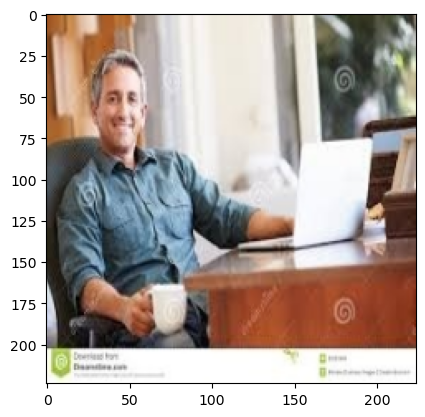

In [82]:
plt.imshow(resized_image)

In [83]:
image.shape

(224, 224, 3)

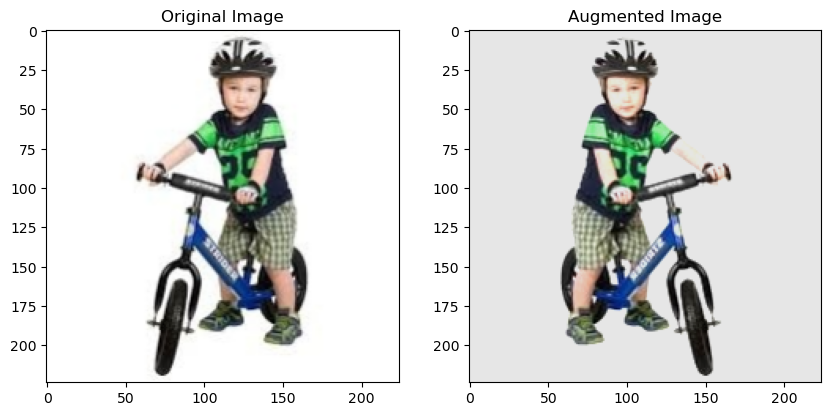

In [60]:
import cv2
import numpy as np
import os

# Function to perform image augmentation
def augment_image(image):
    # Randomly flip the image horizontally
    if np.random.rand() < 0.75:
        image = cv2.flip(image, 1)

    # Randomly adjust brightness
    brightness = np.random.uniform(0.5, 1.5)
    image = cv2.convertScaleAbs(image, alpha=brightness, beta=0)

    # Randomly adjust contrast
    contrast = np.random.uniform(0.5, 1.5)
    image = cv2.convertScaleAbs(image, alpha=contr_augmentedast, beta=0)

    # Randomly crop a region of interest (ROI) from the image
    crop_size = min(image.shape[0], image.shape[1])
    start_x = np.random.randint(0, image.shape[1] - crop_size + 1)
    start_y = np.random.randint(0, image.shape[0] - crop_size + 1)
    image = image[start_y:start_y+crop_size, start_x:start_x+crop_size]

    return image

# Load the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))

# Perform image augmentation
augmented_image = augment_image(image)
augmented_image = cv2.resize(augmented_image, (224, 224))

# Display the original and augmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(augmented_image)
plt.title('Augmented Image')
plt.show()

In [61]:
# save the augmented images
output_directory = data_directory + '/train_augmented'
os.makedirs(output_directory, exist_ok=True)

# get the list of image files
image_files = [f for f in os.listdir(data_directory + '/train') if f.endswith('.jpg')]

In [62]:
for file in image_files:
    # Load the image
    image = cv2.imread(data_directory + '/train/' + file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))

    # Perform image augmentation
    augmented_image = augment_image(image)
    augmented_image = cv2.resize(augmented_image, (224, 224))

    # Save the augmented image
    cv2.imwrite(output_directory + '/' + file, cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))